# Numpy
* Python’s primary data structures are lists and dictionaries.  It doesn't natively have a real equivalent to a multidimensional array provided by other languages.
* Vanilla Python is good at “bookkeeping” but doesn't have the performance/data structures needed for a lot of numerical computation.
* However, Python was designed to run code written in C when performance is needed.
* Numpy was created to provide support for N-dimensional homogenous arrays like what you’re used to using in C/Fortran/Java etc.
* Also provides a variety of mathematical functions to do basic statistics, linear algebra, Fourier transforms, trigonometry, etc.
* Implemented using highly optimized C code.
  * The performance of vectorized Numpy calls are usually comparable to, and can occasionally beat, code written in C to perform the same computations.
* Pandas, xarray, netcdf4/h5py, etc. are built on top of Numpy.  The operations shown here (with some caveats) also work with data obtained using these packages.


# Documentation
* Numpy is a very large library.
* There’s no way we can cover everything it provides.
* I strongly recommend taking a look at the official [documentation](https://numpy.org/doc/stable/reference/index.html) at some point.
* Whenever you’re considering how to do a type of computation, first see if Numpy provides a function that will do it for you.


# Importing
Usually imported as the alias `np`

In [ ]:
import numpy as np

# The NDarray Class
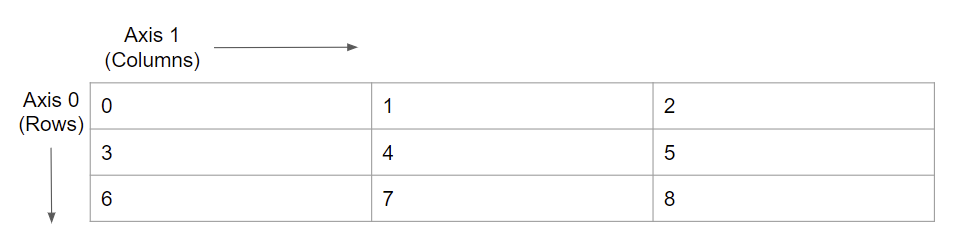
* A third dimension would be Axis 2, a fourth would be Axis 3, etc.
* The order of rows and columns are reversed from how you may be used to seeing them.
  * Numpy is implemented in C which is a “row-major” language. (Fortran is “column-major”).
  * You are not forced to use this convention, but doing so is likely to result in more performant code.

# Creating Arrays From Lists
We can create arrays from lists using the [array](https://numpy.org/doc/stable/reference/generated/numpy.array.html#numpy.array) function

In [ ]:
array_1d = np.array([0, 1, 2])
array_2d = np.array([ [0, 1, 2], [3, 4, 5] ])
print("1D:")
print(array_1d)
print("2D:")
print(array_2d)

1D:
[0 1 2]
2D:
[[0 1 2]
 [3 4 5]]


# Creating Arrays Filled With Zeros
Can create an array initialized with zeros using the [zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html#numpy.zeros) function.

In [ ]:
# This will create a 2D array with 2 rows and 3 columns with a datatype of 32bit floats.
a = np.zeros((2, 3), dtype=np.float32)
print(a)

[[0. 0. 0.]
 [0. 0. 0.]]


# Creating Arrays From A Range of Values
The [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy.arange) function takes the same input as the range function, but allows you to use integers or floating point values.

In [ ]:
a = np.arange(3)
print("a:", a)
b = np.arange(3.0)
print("b:", b)
c = np.arange(5.0, 20.0, 5.0)
print("c:", c)

a: [0 1 2]
b: [0. 1. 2.]
c: [ 5. 10. 15.]


# Other Common Array Creation Routines
* [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace) creates an array of values evenly divided between a start and end value.
* [empty](https://numpy.org/doc/stable/reference/generated/numpy.empty.html#numpy.empty) works the same way as [zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html#numpy.zeros) but does not initialize the array with any values.
* [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html#numpy.meshgrid) creates a grid of coordinates from 1D lists/arrays of the coordinates along each axis.
* Others [here](https://numpy.org/doc/stable/reference/routines.array-creation.html#array-creation-routines).
* The Pandas, xarray, netcdf4/h5py libraries will provide arrays read from files.


# Array Attributes
* You can inspect several array attributes to find important information about them.
* Some of the most common are the number of dimensions, the shape, and the data type.

In [ ]:
# Let's make a 3D array of unsigned 16bit integers.
a = np.zeros((2, 3, 5), dtype=np.uint16)
print("Number of dimensions:", a.ndim)
print("Shape:", a.shape)
print("Data type:", a.dtype)

Number of dimensions: 3
Shape: (2, 3, 5)
Data type: uint16


# Accessing Data
* Use square brackets to access data at a particular index.
* Remember, Python is a zero-indexed language so 0 is the first element of an array and the last element is the array length -1.
* Python allows you to use negative indices to index from the end of an array.


In [ ]:
a = np.arange(5)
print("1D:")
print(a)
print("Value at index 2:", a[2])
print("Value at index 4:", a[4])
print("Value at the end of the array:", a[-1])

a = np.arange(6)
a.shape = (2, 3) # We'll talk about what's going on here in a moment.
print("2D:")
print(a)
print("Value at row 0, column 2:", a[0, 2])
print("Value at row 1, column 2:", a[1, 2])
print("Value at the end of the array:", a[-1, -1])

1D:
[0 1 2 3 4]
Value at index 2: 2
Value at index 4: 4
Value at the end of the array: 4
2D:
[[0 1 2]
 [3 4 5]]
Value at row 0, column 2: 2
Value at row 1, column 2: 5
Value at the end of the array: 5


# Reshaping Arrays
* Sometimes it's necessary to change the dimensions of an array.
* This can be done by calling an array's [reshape](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.reshape.html#numpy.ndarray.reshape) method or by changing the [shape](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html#numpy.ndarray.shape) attribute of the array.

In [ ]:
a = np.arange(6)
print("a:\n", a)

b = a.reshape(2, 3)
print("b:\n", b)

a.shape = (2, 3)
print("a:\n", a)

a:
 [0 1 2 3 4 5]
b:
 [[0 1 2]
 [3 4 5]]
a:
 [[0 1 2]
 [3 4 5]]


# Views vs Copies
* When you perform an operation that changes the shape/order of an array without changing the actual data of an array, you receive a new "view" of the array.
* The actual data is shared between views.
* So index slicing, reshaping, ravelling, and transposing an array produce new views.
* Using [copy](https://numpy.org/doc/stable/reference/generated/numpy.copy.html) or the [array](https://numpy.org/doc/stable/reference/generated/numpy.array.html#numpy.array) function on an array will produce a new copy of the array.
* In general, Numpy will try not to make copies of your data unless you explicitly ask it to.

In [ ]:
a = np.arange(6)
print("a:\n", a)

b = a.reshape((2, 3))
print("b:\n", b)

print("Alter the first element of b.")
b[0, 0] = 999
print("b:\n", b)
print("a:\n", a)

a:
 [0 1 2 3 4 5]
b:
 [[0 1 2]
 [3 4 5]]
Alter the first element of b.
b:
 [[999   1   2]
 [  3   4   5]]
a:
 [999   1   2   3   4   5]


In [ ]:
a = np.arange(6)
print("a:\n", a)

b = np.copy(a)
b[0] = -100
print("b:\n", b)
print("a:\n", a)

a:
 [0 1 2 3 4 5]
b:
 [-100    1    2    3    4    5]
a:
 [0 1 2 3 4 5]


# Common Ways to Reshape/Re-Order Arrays

* [ravel](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html#numpy.ravel) - Library function that returns a 1D view of your array.
* [ndarray.flatten](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) - The `flatten` method of an array makes a 1D copy of your array.
* [squeeze](https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html#numpy.squeeze) - Library function that returns a view of your array with all length 1 dimensions removed.
* [atleast_2d](https://numpy.org/doc/stable/reference/generated/numpy.atleast_2d.html#numpy.atleast_2d)/[atleast_3d](https://numpy.org/doc/stable/reference/generated/numpy.atleast_3d.html#numpy.atleast_3d) - Library functions that return a view of your array with length 1 dimensions added if necessary to make your array have the desired number of dimensions.
* [ndarray.T](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T) - The `T` attribute of an array is a transposed view of your array.
* [Index Slicing](https://numpy.org/doc/stable/reference/arrays.indexing.html) - We'll get to this in a bit.
* More [here](https://numpy.org/doc/stable/reference/routines.array-manipulation.html).

# HW 1

1.   Use the `arange` function to make a 1D array with 6 elements.
2.   Print the first element and the last element of your array.
3.   Change the third element of your array (remember, Python is zero-indexed).
4.   Change the dimensions of your array so that it has 3 rows and 2 columns.
5.   Print the transpose of your 2D array.
6.   Do something to obtain a new view of your array, then alter the data in your view. Print the original array and the view.



In [ ]:
# 1) Use the arange function to make a 1D array with 6 elements.
a = np.arange(6)
print(a)

[0 1 2 3 4 5]


In [ ]:
# 2) Print the first element and the last element of your array.
print(a[0], a[-1])

0 5


In [ ]:
# 3) Change the third element of your array (remember, Python is zero-indexed).
a[2] = 999
print(a)

[  0   1 999   3   4   5]


In [ ]:
# 4) Change the dimensions of your array so that it has 3 rows and 2 columns.
a.shape = (3, 2)
print(a)

[[  0   1]
 [999   3]
 [  4   5]]


In [ ]:
# 5) Print the transpose of your 2D array.
print(a.T)

[[  0 999   4]
 [  1   3   5]]


In [ ]:
# 6) Do something to obtain a new view of your array, 
# then alter the data in your view. 
# Print the original array and the view.
a = np.arange(6)
a.shape = (3, 2)
b = a.T
b[1, 0] = 42
print("a:\n", a)
print("b:\n", b)

a:
 [[ 0 42]
 [ 2  3]
 [ 4  5]]
b:
 [[ 0  2  4]
 [42  3  5]]


# Arithmetic Operators
* Arrays support all of python’s arithmetic operators
  * `+, -, *, **, /, //, +=, -=, *=,**=,/=, //=`
* These operations are performed element-wise to the array.

In [ ]:
a = np.arange(5)
print("a:\n", a)
print("a + 10:\n", a + 10)
b = np.arange(5, 10)
print("b:\n", b)
print("a + b:\n", a + b)

a:
 [0 1 2 3 4]
a + 10:
 [10 11 12 13 14]
b:
 [5 6 7 8 9]
a + b:
 [ 5  7  9 11 13]


# Memory Pitfall
* What’s the difference between `a = a * 5` and `a *= 5`?
* They both produce the same result.
* The first operation requires twice as much memory as the second.
* `a * 5` will be performed so that it does not alter the contents of `a`.  
  * This needs a new array to be allocated to store the results in.
* The `*=` operator knows that it’s altering the contents of `a`, so it doesn’t bother allocating a new array.
* This isn’t a big deal with most arrays you’ll encounter.
  * Numpy does its best to perform your operations with as little memory/cpu resources as possible.
* If `a` is fulldisk GOES ch2 data, the first operation requires about 4GB of memory and the second requires about 2GB.


# Avoiding Loops
* People new to Numpy will frequently write their numeric computation code using a nested loop like they would in C/Fortran.
* They soon find that this is incredibly slow.
* However, loops are actually rarely needed.
* Instead you can "vectorize" your code.
* That is, you can use a single statement to perform an operation on the entire portion of an array it applies to.
* That operation will be performed in highly optimized, compiled, C code.
* This has the added benefit of making your code more succinct.
* You can vectorize your code by making use of broadcasting, index slicing, and advanced indexing.

# Broadcasting

* What happens when we attempt to use an arithmetic operation using two arrays with different sizes or different numbers of dimensions?
* Numpy uses the following rules to determine if the smaller array can be "broadcast" across the larger array:
  * Dimensions are aligned from right to left.
  * Numpy will then determine if all of the dimensions "match".
  * Dimensions match if they are both the same length, one of them is length 1, or if you run out of dimensions in the smaller array.
  * All of the dimensions must match, otherwise a ValueError will be thrown.
* The smaller array will be applied to the larger array across the dimensions.
  * For the length 1 or missing dimensions, you can think of the array values being copied across that dimension so that the operation were being performed as if the two arrays had the exact same shape.
* This can get pretty confusing at higher dimensions, so take a look at the official [documentation](https://numpy.org/doc/stable/user/basics.broadcasting.html).
* It also helps to open up an interactive session and try out your operation to see if it does what you think it does.
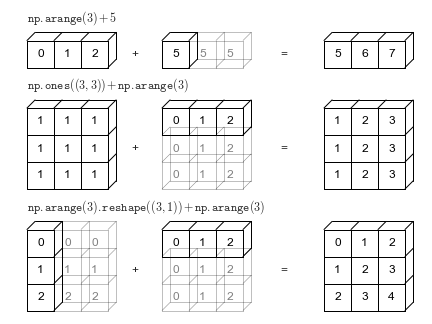

* Image from the Jake VanderPlas [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

In [ ]:
a = np.arange(10, 31, 10)
b = np.arange(6)
b.shape = (2, 3)
print("a:\n", a)
print("b:\n", b)
print("a.shape:   ", a.shape)
print("b.shape:", b.shape)
print("a+b:\n", a + b)

a:
 [10 20 30]
b:
 [[0 1 2]
 [3 4 5]]
a.shape:    (3,)
b.shape: (2, 3)
a+b:
 [[10 21 32]
 [13 24 35]]


In [ ]:
a = np.arange(10, 31, 10)
b = np.arange(6)
a.shape = (3, 1)
b.shape = (3, 2)
print("a:\n", a)
print("b:\n", b)
print("a.shape:", a.shape)
print("b.shape:", b.shape)
print("a+b:\n", a + b)

a:
 [[10]
 [20]
 [30]]
b:
 [[0 1]
 [2 3]
 [4 5]]
a.shape: (3, 1)
b.shape: (3, 2)
a+b:
 [[10 11]
 [22 23]
 [34 35]]


# Index Slicing
* Normal indexing just provides a single index per dimension.
  * EX: `a[5]`
* Index slicing takes the form `start: stop: step` per dimension.
  * EX: `a[5:100:5]` produces a view of `a` that includes just the indices of `a` between 5 and 95 that are a mulitple of 5.
  * This provides a new view of your data just in the range specified by the slice.
  * This should look familiar since this works basically the same way as the range/arange function.
  * `start` is inclusive, `stop` is exclusive, and `step` provides the space between elements.
  * You can omit the `start`, `stop`, or `step`.
    * Omitting the `start`, assumes you are using the beginning of the dimension as the `start`.
    * Omitting the `stop`, assumes you are using the end of the dimension as the `stop`.
    * Omitting the `step` assumes that you are using a `step` of 1.

In [ ]:
a = np.arange(10)
print("a:\n", a)

# Get just the odd numbers in a.
# Start at 1 and use a step of 2.
b = a[1:10:2]
print("b:\n", b)

# Get just the even numbers in a. 
# This is the same as a[0:10:2].
c = a[::2]
print("c:\n", c)

# Get everything:
d = a[:]
print("d:\n", d)

a:
 [0 1 2 3 4 5 6 7 8 9]
b:
 [1 3 5 7 9]
c:
 [0 2 4 6 8]
d:
 [0 1 2 3 4 5 6 7 8 9]


In [ ]:
a_2d = np.arange(10)
a_2d.shape = (2, 5)
print("a_2d:\n", a_2d)

# Just the first row
b = a_2d[0, :]
print("b:\n", b)

a_2d:
 [[0 1 2 3 4]
 [5 6 7 8 9]]
b:
 [0 1 2 3 4]


# Using Arrays as Indices (Advanced Indexing)

* If you need to perform an operation on part of an array, Numpy allows you to use sequences of indices/booleans to specify where an operation should be performed.

In [ ]:
a = np.arange(10)
print("a:\n", a)
indices = [3, 5]
a[indices] = 999
print("a:\n", a)

a:
 [0 1 2 3 4 5 6 7 8 9]
a:
 [  0   1   2 999   4 999   6   7   8   9]


In [ ]:
a = np.arange(10)
a.shape = (2, 5)
print("a:\n", a)
# row indices, then column indices
indices = ((0, 1, 0), (0, 4, 2))
a[indices] = 999
print("a:\n", a)

a:
 [[0 1 2 3 4]
 [5 6 7 8 9]]
a:
 [[999   1 999   3   4]
 [  5   6   7   8 999]]


In [ ]:
a = np.arange(10)
print("a:\n", a)
mask = a > 4
print("mask:\n", mask)
a[mask] = 999
print("a:\n", a)

a:
 [0 1 2 3 4 5 6 7 8 9]
mask:
 [False False False False False  True  True  True  True  True]
a:
 [  0   1   2   3   4 999 999 999 999 999]


# Common Routines For Generating Arrays of Indices/Booleans
* [isinf](https://numpy.org/doc/stable/reference/generated/numpy.isinf.html#numpy.isinf) - Returns an array that is True everywhere the array is inf. 
* [isnan](https://numpy.org/doc/stable/reference/generated/numpy.isnan.html#numpy.isnan) - Returns an array that is True everywhere the array is nan.
* [where](https://numpy.org/doc/stable/reference/generated/numpy.where.html#numpy.where) - Returns an array of indices everywhere a given condition is true.
* [logical_and](https://numpy.org/doc/stable/reference/generated/numpy.logical_and.html#numpy.logical_and) - Performs the logical and between two arrays of booleans.  (Can also use the `&` operator).
* [logical_or](https://numpy.org/doc/stable/reference/generated/numpy.logical_or.html#numpy.logical_or) - Performs the logical or between two arrays of booleans. (Can also use the `|` operator).
* [logical_not](https://numpy.org/doc/stable/reference/generated/numpy.logical_not.html#numpy.logical_not) - Inverts an array of booleans. (Can also use the ~ operator). 

# Boolean Operators

* The `&`, `|`, and `~` operators can be used to perform element-wise logical and, logical or, and logical not operations on arrays of booleans.

In [ ]:
a = np.arange(10)
print("a:\n", a)
mask = (a < 2) & (a > 7) 
print("mask:\n", mask)
a[mask] = 999
print("a:\n", a)

a:
 [0 1 2 3 4 5 6 7 8 9]
mask:
 [False False False False False False False False False False]
a:
 [0 1 2 3 4 5 6 7 8 9]


In [ ]:
a = np.arange(10)
print("a:\n", a)
mask = (a < 2) | (a > 7) 
print("mask:\n", mask)
a[mask] = 999
print("a:\n", a)

a:
 [0 1 2 3 4 5 6 7 8 9]
mask:
 [ True  True False False False False False False  True  True]
a:
 [999 999   2   3   4   5   6   7 999 999]


In [ ]:
print("mask:\n", mask)
print("Not mask:\n", ~mask)

mask:
 [ True  True False False False False False False  True  True]
Not mask:
 [False False  True  True  True  True  True  True False False]


# Masked Arrays

* Frequently we have arrays where portions of the array are invalid. 
  * EX: GOES data where the corners are off the projection of the Earth.
* It would be nice to keep the location of invalid entries with the array and have the array take this into account when performing operations on it.
* Masked arrays provide this functionality.
* The `ma` module provides routines for creating and working with masked arrays.
* Masked arrays can be used in *many*, but not *all*, places a normal NDArray can be used. 
  * Check the relevant documentation to see if masked arrays are supported by the routine you want to use.
  * The `ma` module provides several equivalents to regular Numpy routines that don't support masked arrays.
  * Many libraries external to Numpy don't support masked arrays.
  * Most file formats don't suport masked arrays.
  * The `.filled()` method can be used to convert a masked array to a regular NDArray. Missing values will be placed where the mask is `True`. 
* There's a bit of nuance to how they work and require more time than we have here to get into, so check the [documentation](https://numpy.org/doc/stable/reference/maskedarray.generic.html#the-numpy-ma-module).

In [ ]:
from numpy import ma

a = np.arange(5)

# We'll make a mask where anything less than 2 is "invalid".
mask = a<2
print("Mask:", mask)

# Make a masked array from our NDArray. 
# (Again, this shares data with our original array.)
a_masked = ma.array(a, mask=mask, fill_value=-999)
print("Masked Array:", a_masked)

# Add 10 to all the valid elements.
print("Masked Array + 10:", a_masked + 10)

# Convert back into a regular NDArray with missing values filled in.
print("Regular NDArray:", a_masked.filled())

Mask: [ True  True False False False]
Masked Array: [-- -- 2 3 4]
Masked Array + 10: [-- -- 12 13 14]
Regular NDArray: [-999 -999    2    3    4]


# HW 2

1.   Generate a 2x3 array of data and a 1D array of 2 scale factors.
  * The values don't matter, so use `arange` or `array` to make the arrays.
2.   Reshape the scale factor array so that you can multiply each row of data by its corresponding scale factor.
3. Scale each row of the data array and store the result in a new array
4. Do the same as 3., but store the result back in the data array.
5. Use `arange` to make an array from 0-9 and use index slicing to set indices 2-7 to 999.
6. Make a 2D array with 5 rows and 7 columns.  Use index slicing to print a 3x3 subset of the array centered on index 2, 3.
7. Make an array using `np.arange(10)`.  Set all the values above 6 to -999.
8. Do the same as 7., but create a masked array where all the values above 6 are set to missing.



In [ ]:
# 1)Generate a 2x3 array of data and a 1D array of 2 scale factors.
data = np.arange(6)
data.shape = (2, 3)
scale_factors = np.array([5, 10])

In [ ]:
# 2)Reshape the scale factor array so that you can multiply each row of data by its corresponding scale factor.
scale_factors.shape = (2, 1)
print("scale_factors:\n", scale_factors)

scale_factors:
 [[ 5]
 [10]]


In [ ]:
# 3)Scale each row of the data array and store the result in a new array
scaled_result = scale_factors * data
print("data:\n", data)
print("scaled_result:\n", scaled_result)

data:
 [[0 1 2]
 [3 4 5]]
scaled_result:
 [[ 0  5 10]
 [30 40 50]]


In [ ]:
# 4)Do the same as 3., but store the result back in the data array.
data = scale_factors * data
print("data:\n", data)

data:
 [[ 0  5 10]
 [30 40 50]]


In [ ]:
# 5)Use arange to make an array from 0-9 and use index slicing to set indices 2-7 to 999.
a = np.arange(10)
print("a:\n", a)
a[2:8] = 999
print("a:\n", a)

a:
 [0 1 2 3 4 5 6 7 8 9]
a:
 [  0   1 999 999 999 999 999 999   8   9]


In [ ]:
# 6)Make a 2D array with 5 rows and 7 columns. Use index slicing to print a 3x3 subset of the array centered on index 2, 3.
a = np.arange(35)
a.shape = (5, 7)
print("a:\n", a)
print("subset:\n", a[1:4, 2:5])

a:
 [[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]]
subset:
 [[ 9 10 11]
 [16 17 18]
 [23 24 25]]


In [ ]:
# 7)Make an array using np.arange(10). Set all the values above 6 to -999.
a = np.arange(10)
a[a > 6] = -999
print("a:\n", a)

a:
 [   0    1    2    3    4    5    6 -999 -999 -999]


In [ ]:
# 8)Do the same as 7., but create a masked array where all the values above 6 are set to missing.
a = np.arange(10)
masked = ma.MaskedArray(a, mask=a>6)
print("masked:\n", masked)

masked:
 [0 1 2 3 4 5 6 -- -- --]
